In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import acquire
import prepare
import explore

### Exploratory Analysis

#### Section 1 - iris_db
* Acquire, prepare & split your data.

In [2]:
iris = acquire.get_iris_data()
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa


In [3]:
iris = prepare.prep_iris(iris)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [4]:
target = 'species'
train, validate, test = explore.train_validate_test_split(iris, target)

#### Univariate Stats
* For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe())
* For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
* Document takeaways & any actions.

In [5]:
#Make a list for both categorical and quantitative variables
cat_vars = ['species']
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'versicolor', 'virginica']

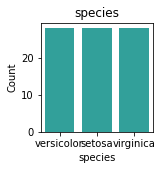

               species  Count  Percent
versicolor  versicolor     28    33.33
setosa          setosa     28    33.33
virginica    virginica     28    33.33
_________________________________________________________________


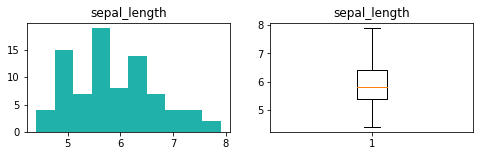

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


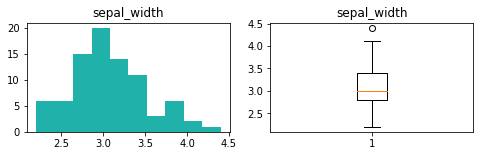

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


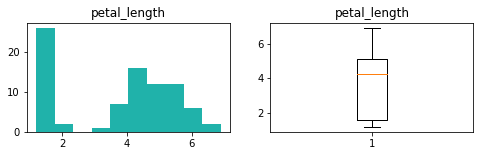

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


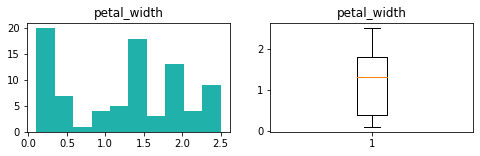

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


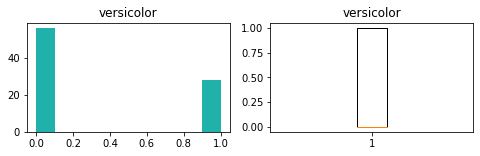

count    84.000000
mean      0.333333
std       0.474236
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: versicolor, dtype: float64


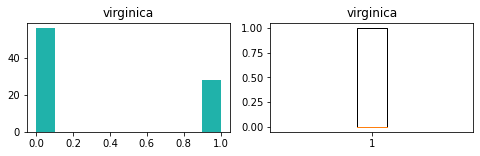

count    84.000000
mean      0.333333
std       0.474236
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: virginica, dtype: float64


In [6]:
#Pass these lists in to the explore_univariate function along with the train dataset
explore.explore_univariate(train, cat_vars, quant_vars)

Takeaways:
* Petal length and petal width seem to have distinctive groupings. Could be useful.
* Sepal length and sepal width don't seem to have any distinctive groupings.
* In the training data set, the species count is divided evenly between all three species, but the versicolor count is equal to two-thirds of the data set. Either something is wrong or I'm not reading the charts correctly.

#### Multivariate Stats

* Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

* Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

* Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

* Document takeaways and any actions.

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlim'

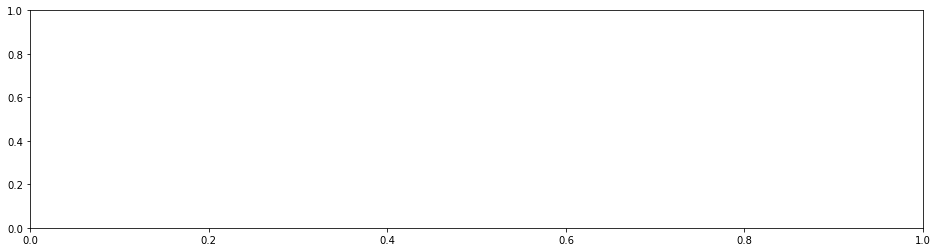

In [7]:
#The target variable is the species
explore.explore_multivariate(train, target, cat_vars, quant_vars)

### I will focus on seaborn for now, since the explore.py file seems to be buggy.

#### Create 4 subplots (2 rows x 2 columns) of scatterplots.
* sepal_length x sepal_width
* petal_length x petal_width
* sepal_area x petal_area
* sepal_length x petal_length

In [8]:
#I don't need the dummy variables for the visualizations, so i'm going to drop them
train.drop(columns = ['versicolor', 'virginica'], inplace = True)

In [10]:
#I need to add a new column for sepal_area and petal_area
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

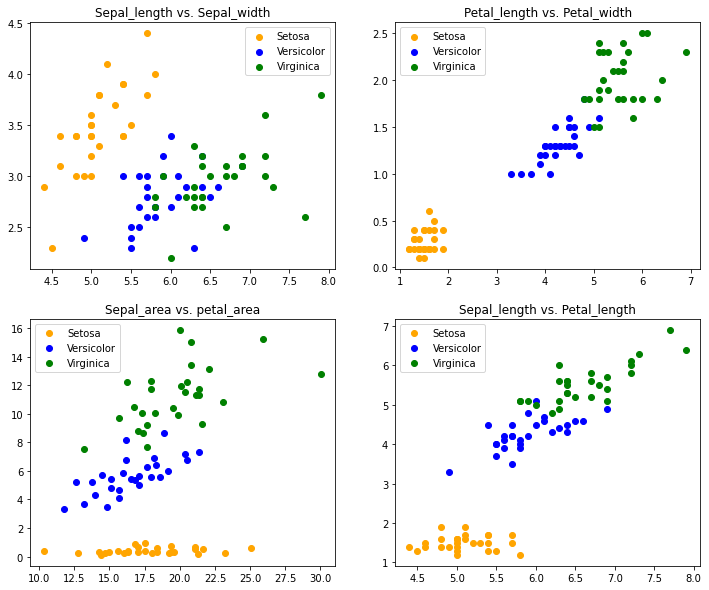

In [24]:
plt.figure(figsize = (12,10))

plt.subplot(221)
plt.scatter(data = train[train.species == 'setosa'], x = 'sepal_length', y = 'sepal_width', c = 'orange', label = 'Setosa')
plt.scatter(data = train[train.species == 'versicolor'], x = 'sepal_length', y = 'sepal_width', c = 'blue', label = 'Versicolor')
plt.scatter(data = train[train.species == 'virginica'], x = 'sepal_length', y = 'sepal_width', c = 'green', label = 'Virginica')
plt.legend()
plt.title('Sepal_length vs. Sepal_width')

plt.subplot(222)
plt.scatter(data = train[train.species == 'setosa'], x = 'petal_length', y = 'petal_width', c = 'orange', label = 'Setosa')
plt.scatter(data = train[train.species == 'versicolor'], x = 'petal_length', y = 'petal_width', c = 'blue', label = 'Versicolor')
plt.scatter(data = train[train.species == 'virginica'], x = 'petal_length', y = 'petal_width', c = 'green', label = 'Virginica')
plt.legend()
plt.title('Petal_length vs. Petal_width')

plt.subplot(223)
plt.scatter(data = train[train.species == 'setosa'], x = 'sepal_area', y = 'petal_area', c = 'orange', label = 'Setosa')
plt.scatter(data = train[train.species == 'versicolor'], x = 'sepal_area', y = 'petal_area', c = 'blue', label = 'Versicolor')
plt.scatter(data = train[train.species == 'virginica'], x = 'sepal_area', y = 'petal_area', c = 'green', label = 'Virginica')
plt.legend()
plt.title('Sepal_area vs. petal_area')

plt.subplot(224)
plt.scatter(data = train[train.species == 'setosa'], x = 'sepal_length', y = 'petal_length', c = 'orange', label = 'Setosa')
plt.scatter(data = train[train.species == 'versicolor'], x = 'sepal_length', y = 'petal_length', c = 'blue', label = 'Versicolor')
plt.scatter(data = train[train.species == 'virginica'], x = 'sepal_length', y = 'petal_length', c = 'green', label = 'Virginica')
plt.legend()
plt.title('Sepal_length vs. Petal_length')
plt.show()

Takeaways:
* The plots of petal_length and petal_width seem to have the most distinctive groupings of all the plots and appears to have a linear relationship. Could be useful later on.
* The plots of sepal_length and petal_length also seem fairly distinctive between species and seem to share a linear relationship except for the setosa species.

#### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [17]:
#Take a look at the train dataset
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,14.82,3.50
36,5.5,3.5,1.3,0.2,setosa,19.25,0.26
133,6.3,2.8,5.1,1.5,virginica,17.64,7.65
95,5.7,3.0,4.2,1.2,versicolor,17.10,5.04
18,5.7,3.8,1.7,0.3,setosa,21.66,0.51


In [18]:
#Melt the train data set
melted_train = train.melt(id_vars = ['species'], var_name = 'measurement', value_name = 'measure_value')

/Users/johnathonsmith/opt/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 45.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnathonsmith/opt/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 64.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnathonsmith/opt/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 36.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnathonsmith/opt/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/johnathon

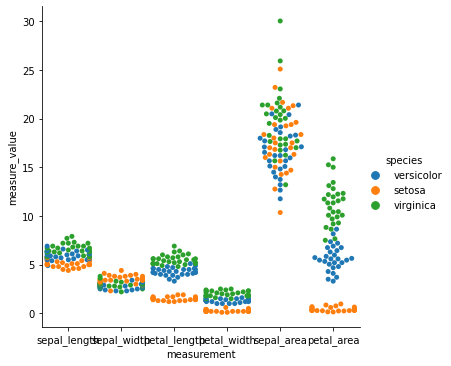

In [19]:
#Plot the swarmplot
sns.catplot(x = 'measurement', y = 'measure_value', kind = 'swarm', hue = 'species', data = melted_train)
plt.show()

Takeaways:
* petal_length and petal_width seem to have the most distinct groupings of all the other plots. Could be useful later on.
* petal_length and petal_width are very distinct for the setosa species. 
* I bet using the ratio of petal_width to petal_length would prove effective.

#### Create a heatmap of each variable layering correlation coefficient on top.

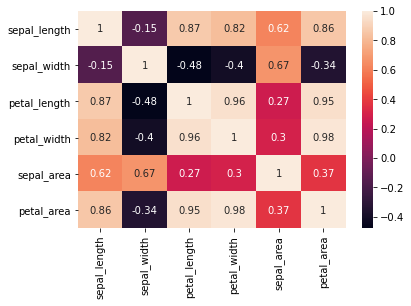

In [25]:
sns.heatmap(train.corr(), annot = True)
plt.show()

Takeaways:
* It appears that I was correct in my previous observation that petal_length and petal_width have a linear relationship. They have a correlation coefficient of 0.96.
* It also seems that petal_length and sepal_length have a fairly linear relationship as well, with a correlation coefficient of 0.87.

#### Create a scatter matrix visualizing the interaction of each variable.

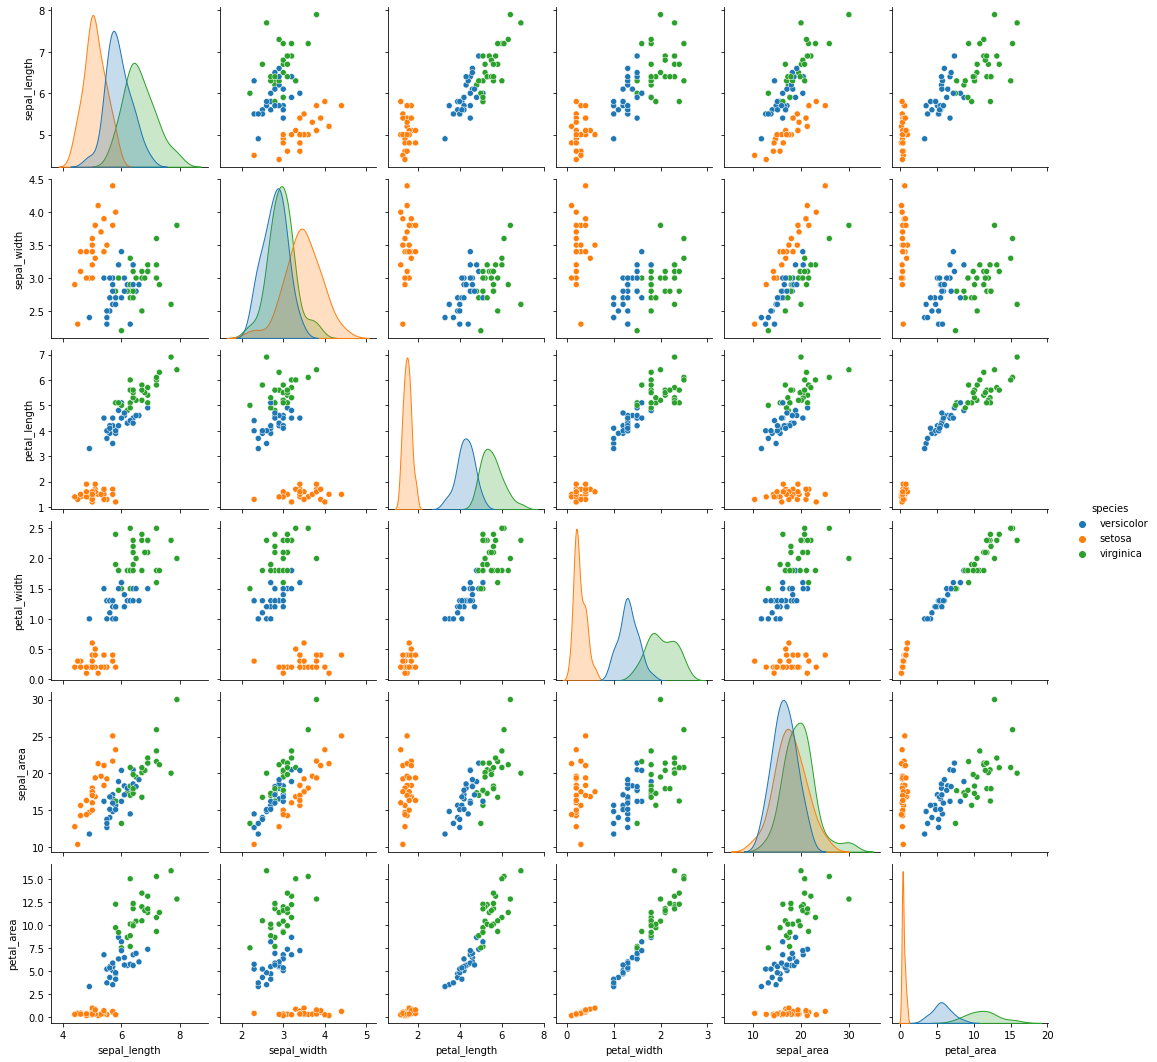

In [21]:
#I'll go ahead and do all the scatterplots
sns.pairplot(train, hue = 'species')
plt.show()

Takeaways:
* The charts for petal_width and petal_area seem very linear. 
* The charts for petal_length and petal_area are also quite linear.

#### Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this. Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

$H_0$: Average sepal length in virginica is the same as average sepal length in versicolor.

$H_a$: Average sepal length in virginica is not the same as average sepal length in versicolor.

In [26]:
alpha = 0.05

In [30]:
#Will use the mann whitney test since n < 30 for both subgroups
virginica_sepal_lengths = train[train.species == 'virginica'].sepal_length
versicolor_sepal_lengths = train[train.species == 'versicolor'].sepal_length

u, p = stats.mannwhitneyu(virginica_sepal_lengths, versicolor_sepal_lengths)
u, p

(107.5, 1.541014598267054e-06)

In [31]:
p < alpha

True

#### Summary
Since p is less than alpha, 0.05, we reject the null hypothesis. Average sepal length of virginica is significantly different than average sepal length of versicolor.

Takeaway:
* Despite the occasional overlap, it seems that in general we can use sepal_length to differentiate between virginica and versicolor.

#### Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.